In [1]:
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense

from sklearn import datasets, preprocessing
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [24]:
# dimensions of our images.
img_width, img_height = 64, 64

train_data_dir = "../datasets/data/train"
validation_data_dir = "../datasets/data/validation"

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=64,
        color_mode="grayscale",
        class_mode="categorical")

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=64,
        color_mode="grayscale",
        class_mode="categorical")

Found 257140 images belonging to 10 classes.
Found 2600 images belonging to 10 classes.


In [25]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Convolution2D(32, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('sigmoid'))

In [26]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [27]:
nb_epoch = 30
nb_train_samples = 2048
nb_validation_samples = 832

In [28]:
history = model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

Epoch 1/30
2048/2048 [==============================] - 10s - loss: 0.4368 - acc: 0.8518 - val_loss: 0.3314 - val_acc: 0.9000
Epoch 2/30
2048/2048 [==============================] - 11s - loss: 0.3675 - acc: 0.8942 - val_loss: 0.3256 - val_acc: 0.9000
Epoch 3/30
2048/2048 [==============================] - 12s - loss: 0.3544 - acc: 0.8981 - val_loss: 0.3199 - val_acc: 0.9000
Epoch 4/30
2048/2048 [==============================] - 11s - loss: 0.3473 - acc: 0.8993 - val_loss: 0.3147 - val_acc: 0.9000
Epoch 5/30
2048/2048 [==============================] - 12s - loss: 0.3301 - acc: 0.9015 - val_loss: 0.3024 - val_acc: 0.9059
Epoch 6/30
2048/2048 [==============================] - 13s - loss: 0.3178 - acc: 0.9049 - val_loss: 0.2862 - val_acc: 0.9092
Epoch 7/30
2048/2048 [==============================] - 12s - loss: 0.3014 - acc: 0.9078 - val_loss: 0.2756 - val_acc: 0.9084
Epoch 8/30
2048/2048 [==============================] - 13s - loss: 0.2928 - acc: 0.9076 - val_loss: 0.2610 - val_acc:

In [13]:
model.save_weights('*.h5')

In [8]:
model.evaluate_generator(validation_generator, nb_validation_samples)

[0.10569244823776759, 0.9495192261842581]

In [9]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 62, 62, 32)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 62, 62, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 31, 31, 32)    0           activation_1[0][0]               
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 29, 29, 32)    9248        maxpooling2d_1[0][0]             
___________________________________________________________________________________________

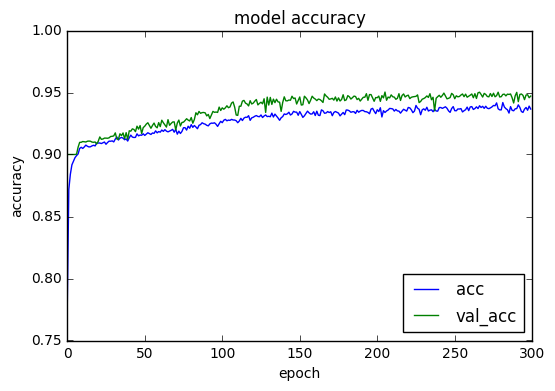

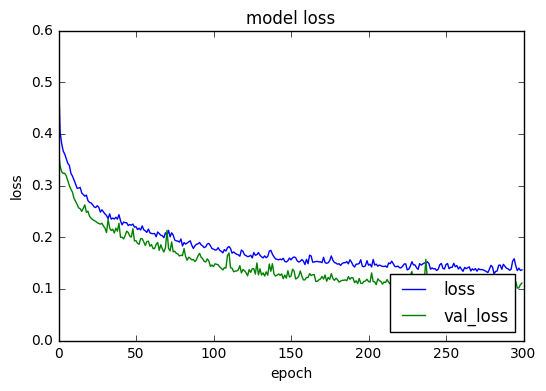

In [12]:
# http://aidiary.hatenablog.com/entry/20161109/1478696865
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)

<Container object of 10 artists>

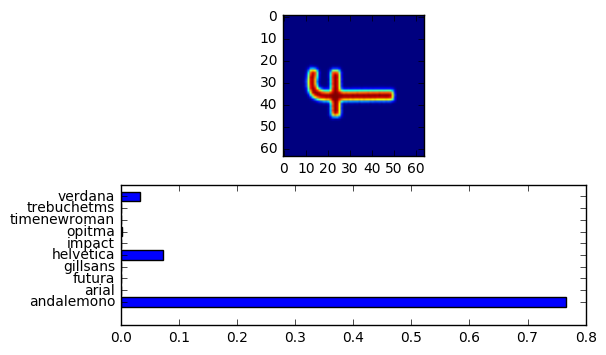

In [71]:
# predict
from keras.preprocessing import image
fonts = ["andalemono", "arial", "futura", "gillsans", "helvetica", "impact", "opitma", "timenewroman", "trebuchetms", "verdana"]
lefts = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 学習済みの重みをロード
model.load_weights('cnn-300epochs.h5')
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

filename = "../datasets/data/validation/andalemono/f-0911.png"

img = image.load_img(filename, target_size=(img_height, img_width), grayscale=True)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

x = x / 255.0

pred = model.predict(x)[0]
plt.subplot(2, 1, 1)
plt.imshow(img)
plt.subplot(2, 1, 2)
plt.barh(lefts, pred, tick_label=fonts, align="center")